In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# local network
#flow_clean = pd.read_csv(r"H:\R&D\Research\Commerce local\Data Analytics\Flux piétons\AFP WTS Tableau report\Data\last_wts_flow_cleaned.csv", sep=",")


In [2]:
#last_wts_flow_cleaned.csv
flow_clean = pd.read_csv(r"./data/last_wts_flow_cleaned.csv", sep=",")
flow_clean.shape

(267015, 12)

In [3]:
flow_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267015 entries, 0 to 267014
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   zone_id          267015 non-null  int64 
 1   id_zone_jour     267015 non-null  object
 2   Date_jour_heure  267015 non-null  object
 3   Annee            267015 non-null  int64 
 4   Mois             267015 non-null  object
 5   Jour_semaine     267015 non-null  object
 6   Date_jour        267015 non-null  object
 7   Heure            267015 non-null  int64 
 8   visit            267015 non-null  int64 
 9   Somme par jour   267015 non-null  int64 
 10  Somme par mois   267015 non-null  int64 
 11  Comptage mois    267015 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 24.4+ MB


In [4]:
flow_clean.zone_id.nunique()

76

In [5]:
# Sort DataFrame
flow_clean = flow_clean.sort_values(by=['zone_id', 'Date_jour_heure'], ascending=True)
# Split the 'Date' variable 
flow_clean[['date', 'time']] = flow_clean.Date_jour_heure.str.split(" ", expand = True)
# Convert Date to DataTime variable
flow_clean['date'] =  pd.to_datetime(flow_clean['date'], format="%d-%m-%y")
# Create the year variable
flow_clean['year'] = flow_clean.date.dt.year

# Data Exploration


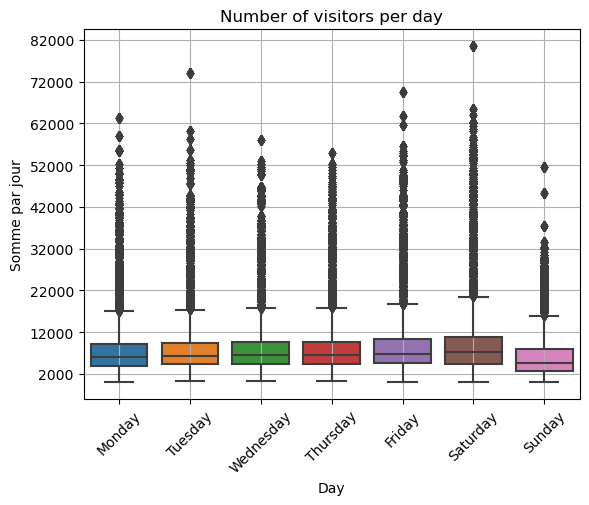

In [6]:
order = order=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.boxplot(data=flow_clean, x='Jour_semaine', y='Somme par jour', order=order) 

ax.grid(True)
ax.set_xlabel('Day')
ax.set_ylabel('Somme par jour')
#Title
title_boxplot = 'Number of visitors per day'
plt.title(title_boxplot)
plt.suptitle('')
start, end = ax.get_ylim()
ax.set_yticks(np.arange(2000, 82500, 10000))
plt.xticks(rotation = 45)
plt.show()

### Plot number of sensors (zone variable)

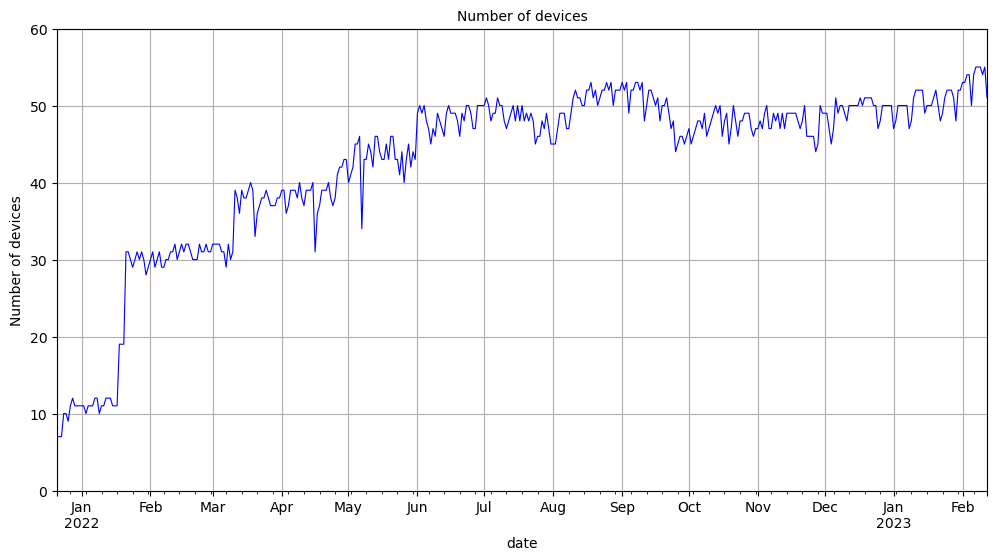

In [7]:
# Plot number of sensors
sensors = flow_clean.groupby('date')['zone_id'].nunique()

def display_lineplot(df, x, y, start, end, title, ylabel):
    """ Function to plot """
    #plt.figure(figsize=(12, 6))
    df.plot.line(x=x, y=y, grid=True, color='blue', linewidth=.8, figsize=(12, 6)) 
    plt.title(title, fontsize=10)
    plt.xticks()
    plt.ylabel(ylabel)
    plt.ylim(start, end)
    plt.yticks()
    plt.savefig("./assets/chart.png")
    return plt.show();

# Call the function
plot = display_lineplot(sensors, x='date', y='sensors', start=0, end=60, title='Number of devices', ylabel='Number of devices')

The number of sensors in December 2021 and January 2022 is not comparable with the other months. We decided to drop December 2021 and January 2022

Drop December 2021 and January 2022

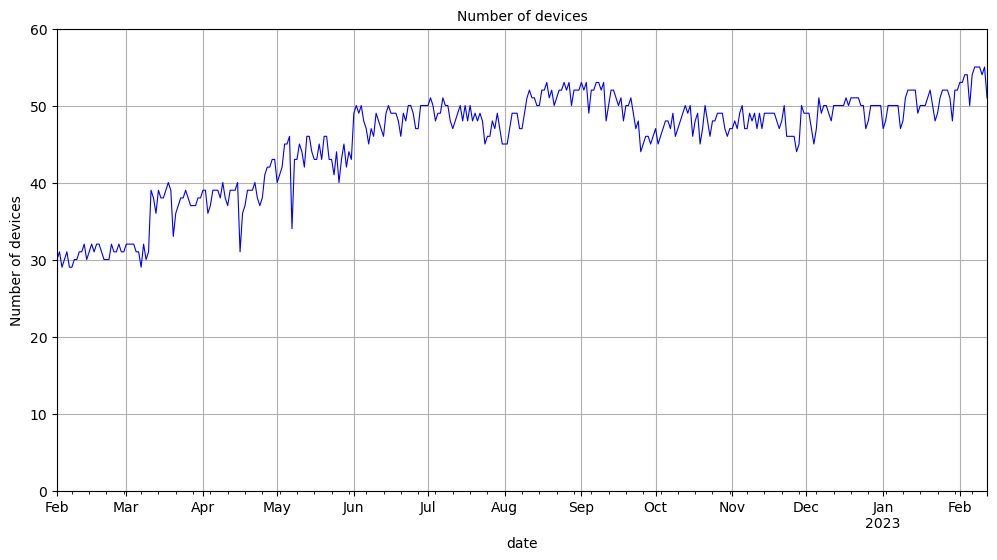

In [8]:
# Drop December 2021 and January 2022 
index = flow_clean.index[((flow_clean['year'] != 2022) | (flow_clean['Mois'] != 'January')) & (flow_clean['year'] != 2021) ].tolist()
flow_clean = flow_clean.loc[index, : ].reset_index(drop=True)

# Plot number of sensors (to compare)
sensors = flow_clean.groupby('date')['zone_id'].nunique()
# Call the function display_lineplot
plot2 = display_lineplot(sensors, x='date', y='sensors', start=0, end=60, title='Number of devices', ylabel='Number of devices')


## Check outliers

Plot zone 10155 Rue Neuve

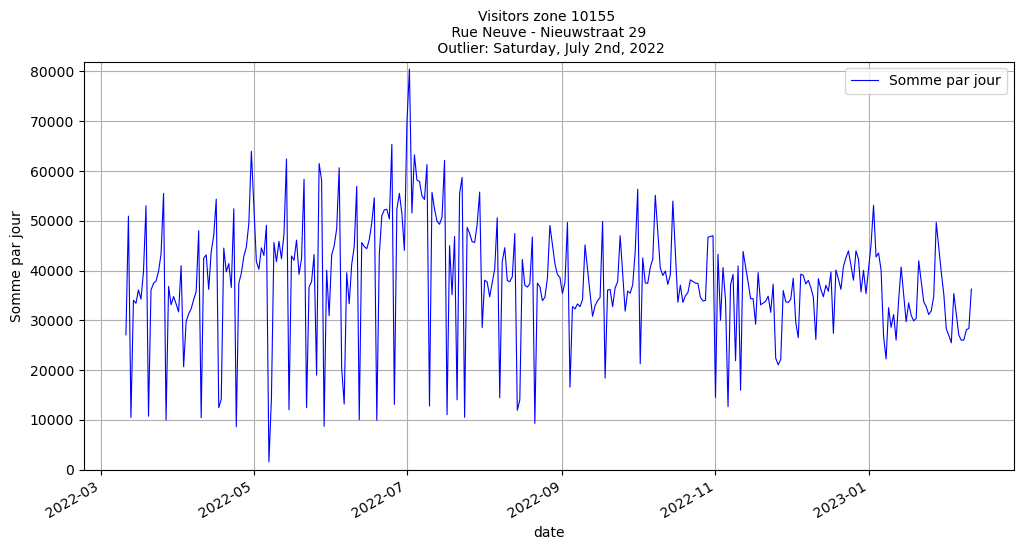

In [10]:
flow_clean.set_index('zone_id', inplace=True)
a = flow_clean.loc[[10155], ['date','Somme par jour']]
a = a.reset_index(level=0, drop=True)
# Call the function display_lineplot
display_lineplot(a, x='date', y ='Somme par jour', start=0, end=82000, title='Visitors zone 10155 \n Rue Neuve - Nieuwstraat 29 \n Outlier: Saturday, July 2nd, 2022', ylabel='Somme par jour')

Plot zone 10148 Lemonnier - Centre medical lemonnier

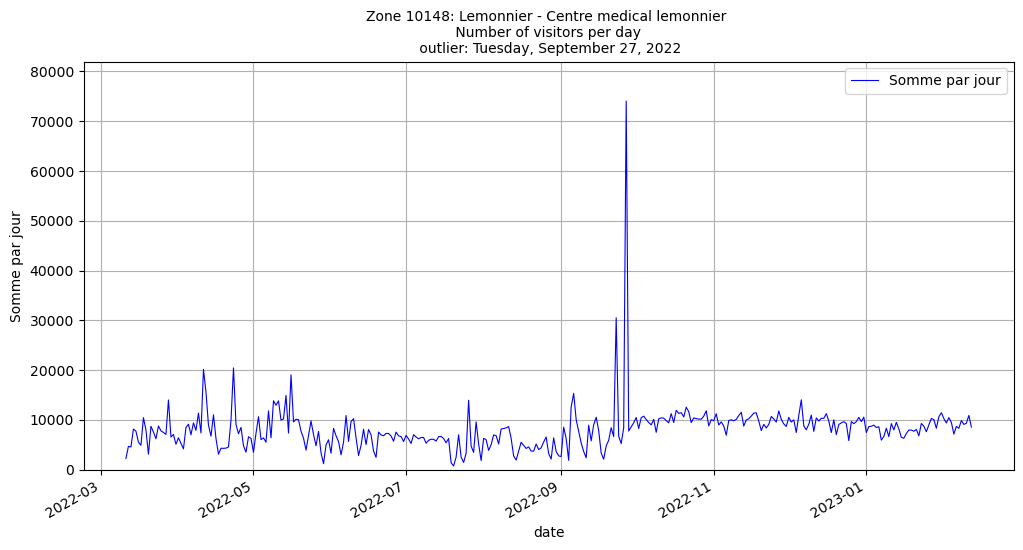

In [11]:
lemonnier = flow_clean.loc[[10148], ['date', 'Jour_semaine', 'Somme par jour']]
lemonnier = lemonnier.reset_index(level=0, drop=True)
# Call the function display_lineplot
fig = display_lineplot(lemonnier, x='date', y ='Somme par jour', start=0, end=82000, title='Zone 10148: Lemonnier - Centre medical lemonnier \n Number of visitors per day \n outlier: Tuesday, September 27, 2022', ylabel='Somme par jour')


Plot zone 10148 Lemonnier - Tuesdays

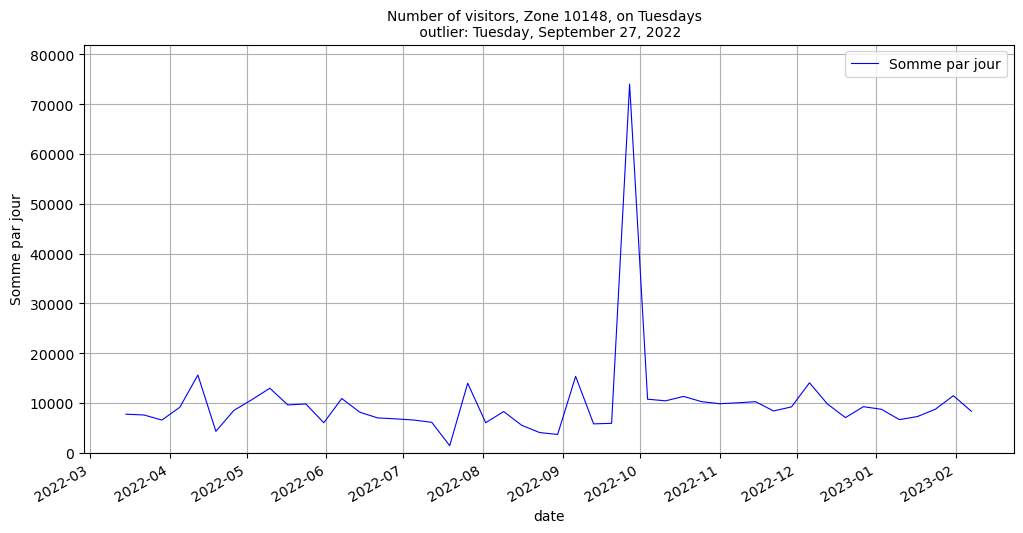

In [12]:
tuesday = lemonnier[lemonnier['Jour_semaine']== 'Tuesday']
# Call the function display_lineplot
display_lineplot(tuesday, x='date', y ='Somme par jour', start=0, end=82000, title='Number of visitors, Zone 10148, on Tuesdays  \n outlier: Tuesday, September 27, 2022', ylabel='Somme par jour')


### Comparing zone 10148 with the surrounding zones 

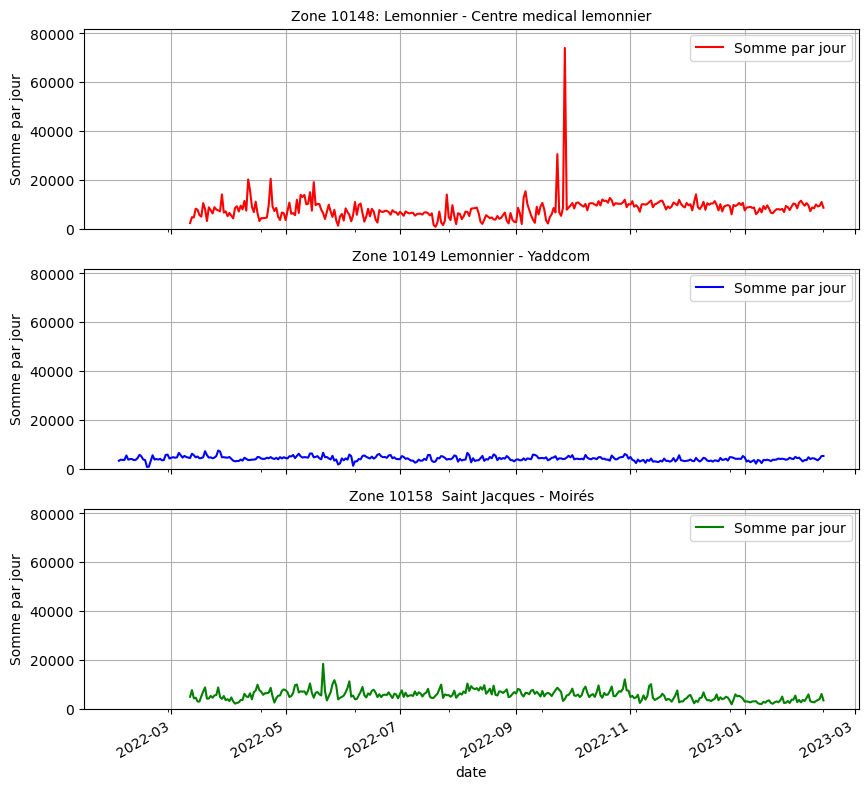

In [15]:
# zone 10149 Lemonnier - Yaddcom
yaddcom = flow_clean.loc[[10149], ['date','Somme par jour']]
yaddcom = yaddcom.reset_index(level=0, drop=True)

# zone 10158  Saint Jacques - Moirés
moires = flow_clean.loc[[10158], ['date','Somme par jour']]
moires = moires.reset_index(level=0, drop=True)

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,10), sharex=True)
lemonnier.plot(x='date', y='Somme par jour',color='red', ax=ax1)
yaddcom.plot(x='date', y='Somme par jour',color='blue', ax=ax2)
moires.plot(x='date', y='Somme par jour',color='green', ax=ax3)
ax1.set_title('Zone 10148: Lemonnier - Centre medical lemonnier', fontsize=10)
ax1.set_ylabel("Somme par jour")
ax1.set_ylim(0, 82000)
ax1.grid(True)
ax2.set_title('Zone 10149 Lemonnier - Yaddcom', fontsize=10)
ax2.set_ylabel("Somme par jour")
ax2.set_ylim(0, 82000)
ax2.grid(True)
ax3.set_title('Zone 10158  Saint Jacques - Moirés', fontsize=10)
ax3.set_ylabel("Somme par jour")
ax3.set_ylim(0, 82000)
ax3.grid(True)
plt.show()


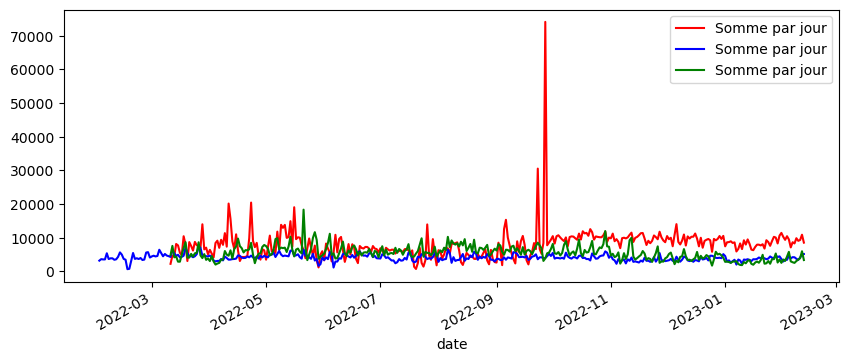

In [16]:
# Setup matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

# Create an axes object 
axes = plt.gca()

lemonnier.plot(x='date', y='Somme par jour',color='red', ax=axes, legend='lemonnier');
yaddcom.plot(x='date', y='Somme par jour',color='blue', ax=axes, legend='yaddcom');
moires.plot(x='date', y='Somme par jour',color='green', ax=axes);
plt.savefig("./assets/lemonnier.png")

### Replace the outlier Lemonnier by its Tuesdays' median

In [17]:
## Find the index the max value in zone 10148
# Reset index
flow_clean.reset_index(drop=False, inplace=True)
# Index of the max value in zone 10148
num_max = flow_clean[flow_clean['zone_id'] == 10148]['Somme par jour'].max()
indexMax = flow_clean.index[(flow_clean['zone_id'] == 10148) & (flow_clean['Somme par jour'] == num_max)].to_list()
# Calculate the Tuesdays' median zone 10148
median_Tuesday = flow_clean[(flow_clean['zone_id'] == 10148) & (flow_clean['Jour_semaine'] == 'Tuesday')]['Somme par jour'].median()
median_Tuesday 

# Replace the outlier by the Tuesdays' median 
flow_clean.loc[indexMax, 'Somme par jour']=median_Tuesday
#flow_clean.to_csv('check.csv') 

### Plot zone 10148 to compare

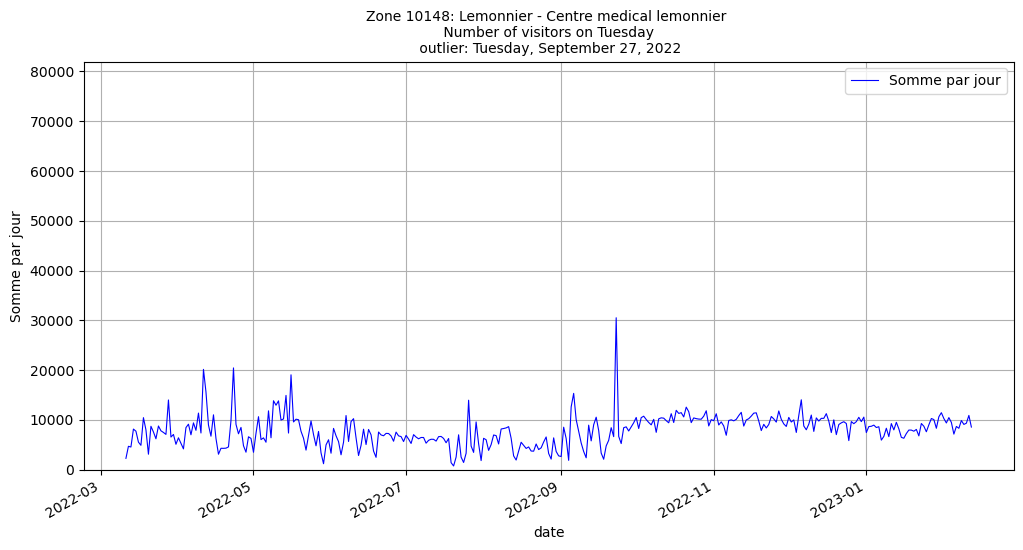

In [18]:
flow_clean.set_index('zone_id', inplace=True)
b = flow_clean.loc[[10148], ['date', 'Jour_semaine', 'Somme par jour']]
b = b.reset_index(level=0, drop=True)
display_lineplot(b, x='date', y ='Somme par jour', start=0, end=82000, title='Zone 10148: Lemonnier - Centre medical lemonnier \n Number of visitors on Tuesday \n outlier: Tuesday, September 27, 2022', ylabel='Somme par jour')


# Create a 'day_part' variable

In [58]:
#day_part function
def day_part(Heure):
    if Heure in [7, 8, 9, 10, 11]:
        return 'part_1'
    elif Heure in [12,13,14,15,16]:
        return 'part_2'
    elif Heure in [17,18,19,20,21]:
        return 'part_3'

#Run function with apply method
flow_clean['day_part'] = flow_clean['Heure'].apply(day_part)

# List of the segmentation part of the day
columns_partDay = flow_clean["day_part"].unique().tolist()
columns_partDay

['part_1', 'part_2', 'part_3']

Calculate the sum of visitors per part of the day

In [59]:
# reset the index
flow_clean.reset_index('zone_id', inplace=True)
# Split the 'Date' variable 
flow_clean[['date', 'time']] = flow_clean.Date_jour_heure.str.split(" ", expand = True)
## calculate the sum of visitors per part of the day
flow_clean["Sum_part_day"]=flow_clean.groupby(['zone_id','date','day_part']).visit.transform('sum')
flow_clean.shape

(256770, 17)

## Calculate the Coefficiet of Variation 

In [60]:
# Coefficient of Variation per Sensor
flow_clean['Coef_Var'] = flow_clean.groupby(['zone_id'])[['visit']].transform('std') / flow_clean.groupby(['zone_id'])[['visit']].transform('mean')

# Coefficient of Variation per Day and Sensor
flow_clean['Coef_Var_perDay'] = flow_clean.groupby(['zone_id', 'Jour_semaine'])[['visit']].transform('std') / flow_clean.groupby(['zone_id', 'Jour_semaine'])[['visit']].transform('mean')


## Calculate the Coefficiet of Variation - Weekday from Monday to Friday

In [61]:
weekday = flow_clean.copy()
weekday= weekday.loc[ ( weekday['Jour_semaine'] != 'Sunday') & (weekday['Jour_semaine'] != 'Saturday' ), ['zone_id', 'Jour_semaine', 'visit' ]]
weekday.Jour_semaine.value_counts()

# Coefficient of Variation 
weekday['cv_weekday'] = weekday.groupby(['zone_id'])[['visit']].transform('std') / weekday.groupby(['zone_id'])[['visit']].transform('mean')

weekday = weekday.drop(['Jour_semaine','visit'], axis=1)
weekday.drop_duplicates(inplace=True)
weekday = weekday.reset_index(drop=True)
weekday

,zone_id,cv_weekday
0,10137,0.370237
1,10141,0.548940
2,10144,0.695201
3,10147,0.398095
4,10148,0.924422
...,...,...
71,14213,0.439311
72,14214,0.466228
73,14260,0.590249
74,14262,0.406264


# DataSet without 'Heure' and 'visit', info per day

In [62]:
# DataSet without 'Heure' and 'visit', info per day
# Select columns 
df = flow_clean.loc[:,['zone_id', 'date', 'year', 'Mois', 'Jour_semaine', 'Somme par jour', 'day_part', 'Sum_part_day', 
                    'Coef_Var', 'Coef_Var_perDay']] #'std_perDay_perSensor', 'std_perSensor',
# Sort DataFrame
df.sort_values(by=['zone_id', 'date'])
# Drop duplicates
df.drop_duplicates(inplace=True, ignore_index=True)
# Convert Date to DataTime variable
df['date'] =  pd.to_datetime(df['date'], format="%d-%m-%y")
df.shape

(51354, 10)

## Calculations average of visitors

In [63]:
# #Average visitors per day (total sensors)
df["avg_visits_perDay"] = df.groupby(['date'])['Somme par jour'].transform('mean')
#Average visitors per sensor
df["avg_visits_perSensor"] = df.groupby(['zone_id'])['Somme par jour'].transform('mean')
#Average day visitors per sensor
df['avg_visits_perDay_perSensor'] = df.groupby(['zone_id', 'Jour_semaine'])['Somme par jour'].transform('mean')
## Average of visitors per part of the day (per sensor)
df["avg_visits_partOfDay_perSensor"]=df.groupby(['zone_id','day_part'])['Sum_part_day'].transform('mean')


## Create a public holidays flag
Belgium Public Holidays 2022  
New Year's Day: '01-01-22'     Easter Monday: '18-04-22'    Labour Day: '01-05-22'        Ascension Day: '26-05-22'   Whit Monday: '06-06-22'     
National Day:   '21-07-22'     Assumption Day: '15-08-22'   All Saints' Day: '01-11-22'   Armistice Day: '11-11-22'    Christmas Day: '25-12-22'    

In [64]:
# Holidays dictionary
holidays = {'Easter Monday 22': '18-04-22', 'Labour Day 22':'01-05-22', 'Ascension Day 22': '26-05-22', 'Whit Monday 22': '06-06-22',     
'National Day 22': '21-07-22', 'Assumption Day 22': '15-08-22', 'All Saints\' Day 22': '01-11-22', 'Armistice Day 22': '11-11-22', 'Christmas Day 22': '25-12-22', 'New Year\'s Day 23': '01-01-23'}
holidays = pd.DataFrame.from_dict(holidays, orient ='index',  columns=['date'])
# Convert Date to DataTime variable
holidays['date'] =  pd.to_datetime(holidays['date'], format="%d-%m-%y")

# Flag school holidays
df['public_holidays_flag'] = np.where(df['date'].dt.date.astype(str).isin(holidays['date'].dt.date.astype(str).tolist()),1,0)


## Create a school holidays flag

In [65]:
# Range of timestamps 2022
#Spring/carnival break: 28 February – 4 March 2022
spring = pd.date_range(start="02-28-22",end="03-04-22", freq='D')
#Easter break: 4–18 April 2022
easter = pd.date_range(start="04-04-22",end="04-18-22", freq='D')
#Summer holiday: 1 July – 31 August 2022
summer = pd.date_range(start="07-01-22",end="08-31-22", freq='D')
#Autumn break: 31 October – 4 November 2022
autumn = pd.date_range(start="10-31-22",end="11-04-22", freq='D')
#Christmas/winter break: 26 December 2022 – 6 January 2023
christmas = pd.date_range(start="12-26-22",end="01-06-23", freq='D')
#Concatenate DatetimeIndex objects
combined = spring.union(easter).union(summer).union(autumn).union(christmas)
#DatetimeIndex to a DataFrame
combined = combined.to_frame(index=False, name='school_dates')
# Flag school holidays
df['school_holidays_flag'] = np.where(df['date'].dt.date.astype(str).isin(combined['school_dates'].dt.date.astype(str).tolist()),1,0)
#df.head(10)


# Start date

In [66]:
# Start date
g = df.groupby('zone_id')['date']
df = df.assign(startdate = g.transform('min'), enddate = g.transform('max'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51354 entries, 0 to 51353
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   zone_id                         51354 non-null  int64         
 1   date                            51354 non-null  datetime64[ns]
 2   year                            51354 non-null  int64         
 3   Mois                            51354 non-null  object        
 4   Jour_semaine                    51354 non-null  object        
 5   Somme par jour                  51354 non-null  float64       
 6   day_part                        51354 non-null  object        
 7   Sum_part_day                    51354 non-null  int64         
 8   Coef_Var                        51354 non-null  float64       
 9   Coef_Var_perDay                 51354 non-null  float64       
 10  avg_visits_perDay               51354 non-null  float64       
 11  av

# Join Datasets

### Join with zones

In [67]:
# Read the file
zones = pd.read_csv('./assets/zones_modif.csv')
zones = zones.drop(['Unnamed: 0'], axis=1)
zones.shape
# Join
join_df=pd.merge(zones, df, on='zone_id', how='left')
# Convert Date to DataTime variable for the next Join
join_df['date'] =  pd.to_datetime(join_df['date'], format="%d-%m-%y")
join_df.shape

(51162, 28)

### DataFrame Fixed sensors 

In [68]:
# DataFrame Fixed Sensors
join_df = join_df[join_df['type_capteur'] != 'temporaire']
join_df.reset_index(drop=True, inplace=True)
join_df['type_capteur'].value_counts()

fixe    47874
Name: type_capteur, dtype: int64

### Join with the weather info

In [69]:
# Read the file
weather = pd.read_csv('./assets/weather_daily.csv')
weather = weather.drop(['Unnamed: 0'], axis=1)
# Convert Date to DataTime variable
weather['date'] =  pd.to_datetime(weather['date'], format="%Y-%m-%d")
# Join
join_df=pd.merge(join_df, weather, on='date', how='left')
join_df.shape

(47874, 40)

In [70]:
join_df.zone_id.nunique()

53

# Join DataSet File

Join Flow_clean file:
- without 'Heure' and 'visit'
- without December 2021 and January 2022
- replace outlier Zone 10148 Lemonnier. Tuesday, September 27, 2022. 

Weather:  
- per day

In [71]:
join_df.to_csv('./assets/Dataset_allVariables.csv')

## DataFrame average visitors per school holidays and fixed sensors

In [72]:
df_school_holidays = join_df.copy()
# Dataframe School holidays flag and fixed sensor 
df_school_holidays = df_school_holidays.loc[df_school_holidays.school_holidays_flag == 1].loc[df_school_holidays.type_capteur == 'fixe', ['zone_id', 'date', 'year', 
'type_capteur', 'Somme par jour', 'school_holidays_flag', 'avg_visits_perSensor']]  
#Average visitors per sensor during the school holidays
df_school_holidays["avg_visits_perSensor_school"] = df_school_holidays.groupby(['zone_id'])['Somme par jour'].transform('mean').round(0)

In [73]:
df_school_holidays = df_school_holidays.loc[:, ['zone_id', 'avg_visits_perSensor_school', 'avg_visits_perSensor']]
# Sort DataFrame
df.sort_values('zone_id')
# Drop duplicates
df_school_holidays.drop_duplicates(inplace=True, ignore_index=True)
# Calculate the 'ratio_school' variable
df_school_holidays['ratio_school'] = df_school_holidays.avg_visits_perSensor_school.div(df_school_holidays.avg_visits_perSensor)
df_school_holidays.shape 

(51, 4)

In [ ]:
df_school_holidays

## DataFrame public holidays and fixed sensors

In [74]:
df_public_holidays = join_df.copy()
# Dataframe School holidays flag and fixed sensor 
df_public_holidays = df_public_holidays.loc[df_public_holidays.public_holidays_flag == 1, ['zone_id', 'date', 'year', 
'type_capteur', 'Somme par jour','public_holidays_flag', 'avg_visits_perSensor']]

#Average visitors per sensor during the school holidays
df_public_holidays["avg_visits_perSensor_public"] = df_public_holidays.groupby(['zone_id'])['Somme par jour'].transform('mean').round(0)

# Variables for the ratio
df_public_holidays = df_public_holidays.loc[:, ['zone_id', 'avg_visits_perSensor_public', 'avg_visits_perSensor']]
# Sort DataFrame
df.sort_values('zone_id')
# Drop duplicates
df_public_holidays.drop_duplicates(inplace=True, ignore_index=True)
df_public_holidays['ratio_public'] = df_public_holidays.avg_visits_perSensor_public.div(df_public_holidays.avg_visits_perSensor)
df_public_holidays = df_public_holidays[['zone_id', 'avg_visits_perSensor_public', 'ratio_public']]
df_public_holidays.shape

(49, 3)

In [ ]:
df_public_holidays

# DataFrame weekday

In [75]:
day = join_df.copy()
# Only fixed sensors
day = day.loc[:,['zone_id', 'Jour_semaine', 'avg_visits_perDay_perSensor' ]]
day.drop_duplicates(inplace=True)
# Pivot table
day_df = day.pivot(index='zone_id', columns='Jour_semaine', values='avg_visits_perDay_perSensor').reset_index(drop=False).add_prefix('avg_')
day_df = day_df.rename_axis(None, axis=1)

# DataFrame
day_df = day_df[['avg_zone_id', 'avg_Monday', 'avg_Tuesday', 'avg_Wednesday', 'avg_Thursday', 'avg_Friday', 'avg_Saturday', 'avg_Sunday']]
day_df.columns = day_df.columns.str.replace('avg_zone_id', 'zone_id')
# Average of the average of every weekday (Monday, Tuesday, Wednesday, Thursday and Friday)
day_df['avg_avg_weekday'] = day_df[['avg_Monday', 'avg_Tuesday', 'avg_Wednesday', 'avg_Thursday', 'avg_Friday']].mean(axis=1)
day_df['ratio_Saturday'] = day_df.avg_Saturday.div(day_df.avg_avg_weekday)
day_df['ratio_Sunday'] = day_df.avg_Sunday.div(day_df.avg_avg_weekday)

# Calculate the relative values per day
columns = ['avg_Monday', 'avg_Tuesday', 'avg_Wednesday', 'avg_Thursday',
       'avg_Friday', 'avg_Saturday', 'avg_Sunday']
#day_df['sum_visits']  =(day_df.loc[:, columns].sum(axis=1))
# Iterate over columns
for col in columns:
    day_df[str(col+"_relat")] = (day_df[col]) / (day_df.loc[:, columns].sum(axis=1))  
# Reset Index
day_df.reset_index(drop=True, inplace=True)
day_df = day_df.rename_axis(None, axis=1)
#day_df.head()


# DataFrame Day - Coefficient Variation

In [76]:
cv_df = join_df.copy()
# Select variables
cv_df = cv_df.loc[:, ['zone_id', 'Jour_semaine', 'Coef_Var_perDay' ]]
cv_df.drop_duplicates(inplace=True)
# Pivot table
cv_table = cv_df.pivot(index='zone_id', columns='Jour_semaine', values='Coef_Var_perDay').reset_index(drop=False).add_prefix('cv_')
# Rename axis
cv_table = cv_table.rename_axis(None, axis=1)
# Order the columns 
cv_table = cv_table[['cv_zone_id', 'cv_Monday', 'cv_Tuesday', 'cv_Wednesday', 'cv_Thursday', 'cv_Friday', 'cv_Saturday', 'cv_Sunday']]
cv_table.columns = cv_table.columns.str.replace('cv_zone_id', 'zone_id')

# Coeficient Variation weekday
cv_table = pd.merge(cv_table, weekday[['zone_id', 'cv_weekday']], on='zone_id', how='left')
# std Saturday ratio
cv_table['cv_ratio_Saturday'] = cv_table.cv_Saturday.div(cv_table.cv_weekday) 
# std Sunday ratio
cv_table['cv_ratio_Sunday'] = cv_table.cv_Sunday.div(cv_table.cv_weekday) 
#cv_table.head(60)

# Create dataframe part of the day 

In [77]:
partDay = join_df.copy()
# Only in the part_of_the_day  DataFrame: Drop Lemonnier, Tuesday 27, 2022. 
partDay_clean = partDay[(partDay.date != '27-09-22') | (partDay.zone_id != 10148)]
# Only fixed sensors
partDay_clean = partDay_clean.loc[partDay_clean.type_capteur == 'fixe',['zone_id', 'day_part', 'avg_visits_partOfDay_perSensor', 'type_capteur',  ]]
partDay_clean.drop_duplicates(inplace=True)
# Pivot table
partDay_clean = partDay_clean.pivot(index='zone_id', columns='day_part', values='avg_visits_partOfDay_perSensor')  
# Reset Index
partDay_clean.reset_index(drop=False, inplace=True)
partDay_clean = partDay_clean.rename_axis(None, axis=1)
# Calculate the sum visits
#partDay_clean['sum_visits']  = partDay_clean.iloc[:,1:].sum(axis=1)

# Iterate over columns
for col in columns_partDay:
    partDay_clean[str(col+"_relat")] = (partDay_clean[col]) / partDay_clean.iloc[:,1:].sum(axis=1)  

#partDay_clean.tail()

## 'Coef_Var' and 'startdate'

In [79]:
variables = join_df.copy()
variables = variables[['zone_id','Coef_Var', 'startdate']]   
variables.drop_duplicates(inplace=True)
variables = variables.sort_values('zone_id')
variables.reset_index(drop=True)

,zone_id,Coef_Var,startdate
0,10137,0.445014,2022-02-01
1,10141,0.565291,2022-02-01
2,10144,0.728161,2022-02-01
3,10147,0.427223,2022-03-11
4,10148,0.899245,2022-03-11
5,10149,0.532895,2022-02-01
6,10150,0.547830,2022-02-01
7,10151,1.103285,2022-03-11
8,10152,0.480048,2022-05-04
9,10153,0.535049,2022-02-01


## Join the ratios and relatives in a dataframe

In [80]:
#  -  the model doesn't accept NAN values
ratios = pd.merge(partDay_clean, df_school_holidays, on='zone_id', how='left').merge(df_public_holidays, on='zone_id', how='left').merge(
              day_df, on='zone_id', how='left').merge(cv_table, on='zone_id', 
              how='left').merge(variables, on='zone_id', how='left')  
ratios.shape

(53, 41)

In [81]:
ratios.columns

Index(['zone_id', 'part_1', 'part_2', 'part_3', 'part_1_relat', 'part_2_relat',
       'part_3_relat', 'avg_visits_perSensor_school', 'avg_visits_perSensor',
       'ratio_school', 'avg_visits_perSensor_public', 'ratio_public',
       'avg_Monday', 'avg_Tuesday', 'avg_Wednesday', 'avg_Thursday',
       'avg_Friday', 'avg_Saturday', 'avg_Sunday', 'avg_avg_weekday',
       'ratio_Saturday', 'ratio_Sunday', 'avg_Monday_relat',
       'avg_Tuesday_relat', 'avg_Wednesday_relat', 'avg_Thursday_relat',
       'avg_Friday_relat', 'avg_Saturday_relat', 'avg_Sunday_relat',
       'cv_Monday', 'cv_Tuesday', 'cv_Wednesday', 'cv_Thursday', 'cv_Friday',
       'cv_Saturday', 'cv_Sunday', 'cv_weekday', 'cv_ratio_Saturday',
       'cv_ratio_Sunday', 'Coef_Var', 'startdate'],
      dtype='object')

In [82]:
ratios.to_csv("./assets/ratios.csv")